In [1]:
"""
The code for the short corridor environment and both Q-algorithms are adapted from the following Github repository:

S. Zhang and K. Shimada. Python replication for Sutton Barto’s book Reinforcement Learning:An Introduction (2nd Edition).
https://github.com/ShangtongZhang/reinforcement-learning-an-introduction/blob/master/chapter06/maximization_bias.py.2021.

"""
#######################################################################
# Copyright (C)                                                       #
# 2016-2018 Shangtong Zhang(zhangshangtong.cpp@gmail.com)             #
# 2016 Kenta Shimada(hyperkentakun@gmail.com)                         #
# Permission given to modify the code as long as you keep this        #
# declaration at the top                                              #
#######################################################################

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm
import copy

In [2]:
def running_mean(vals, n=10):
    cumvals = np.array(vals).cumsum()
    return (cumvals[n:] - cumvals[:-n]) / n

In [137]:
# state A
STATE_A = 0

# state B
STATE_B = 1

# use one terminal state
STATE_TERMINAL = 2

# starts from state A
STATE_START = STATE_A

# possible actions in A
ACTION_A_RIGHT = 0
ACTION_A_LEFT = 1

# probability for exploration
EPSILON = 0.1

# step size
# ALPHA = 0.2 # Set later in the code

# discount for max value
GAMMA = 1.0

# possible actions in B, maybe 10 actions
ACTIONS_B = range(0, 10)

# mean of action rewards at state B
MEAN_REWARD = 0.2
if MEAN_REWARD < 0:
    SIGN = 'neg'
else:
    SIGN = 'pos'
# all possible actions
STATE_ACTIONS = [[ACTION_A_RIGHT, ACTION_A_LEFT], ACTIONS_B]

# state action pair values, if a state is a terminal state, then the value is always 0
INITIAL_Q = [np.zeros(2), np.zeros(len(ACTIONS_B)), np.zeros(1)]

# set up destination for each state and each action
TRANSITION = [[STATE_TERMINAL, STATE_B], [STATE_TERMINAL] * len(ACTIONS_B)]

# choose an action based on epsilon greedy algorithm
def choose_action(state, q_value):
    if np.random.binomial(1, EPSILON) == 1:
        return np.random.choice(STATE_ACTIONS[state])
    else:
        values_ = q_value[state]
        return np.random.choice([action_ for action_, value_ in enumerate(values_) if value_ == np.max(values_)])

# take @action in @state, return the reward
def take_action(state, action):
    if state == STATE_A:
        return 0
    return np.random.normal(MEAN_REWARD, 1)

# if there are two state action pair value array, use double Q-Learning
# otherwise use normal Q-Learning
def q_learning(q1, q2=None, ALPHA_=None):
    state = STATE_START
    # track the # of action left in state A
    left_count = 0
    cum_reward = 0
    while state != STATE_TERMINAL:
        if q2 is None:
            action = choose_action(state, q1)
        else:
            # derive a action form Q1 and Q2
            action = choose_action(state, [item1 + item2 for item1, item2 in zip(q1, q2)])
        if state == STATE_A and action == ACTION_A_LEFT:
            left_count += 1
        reward = take_action(state, action)
        cum_reward += reward
        next_state = TRANSITION[state][action]
        if q2 is None:
            active_q = q1
            target = np.max(active_q[next_state])
        else:
            if np.random.binomial(1, 0.5) == 1:
                active_q = q1
                target_q = q2
            else:
                active_q = q2
                target_q = q1
            best_action = np.random.choice([action_ for action_, value_ in enumerate(active_q[next_state]) if value_ == np.max(active_q[next_state])])
            target = target_q[next_state][best_action]

        # Q-Learning update
        if ALPHA_:
            active_q[state][action] += ALPHA_ * (reward + GAMMA * target - active_q[state][action])
        else:
            active_q[state][action] += ALPHA * (reward + GAMMA * target - active_q[state][action])
        state = next_state
    if q2 is not None:
        return left_count, cum_reward, (q1[0][1] + q2[0][1])/2, (np.max(q1[1]) + np.max(q2[1]) )/2 #(np.mean(q1[STATE_B]) + np.mean(q2[STATE_B]))/2
    else:
        return left_count, cum_reward, q1[0][1], np.max(q1[1])#np.mean(q1[STATE_B])

In [124]:
# # Figure 6.7, 1,000 runs may be enough, # of actions in state B will also affect the curves
# from collections import defaultdict
# # each independent run has 300 episodes
# episodes = 5000
# runs = 100
# left_counts_q = np.zeros((runs, episodes))
# left_counts_double_q = np.zeros((runs, episodes))
# cum_reward_q = np.zeros((runs, episodes))
# cum_reward_double_q = np.zeros((runs, episodes))
# Bqvalue_q = np.zeros((runs, episodes))#defaultdict(lambda: defaultdict(lambda: 0))
# Bqvalue_double_q = np.zeros((runs, episodes))#defaultdict(lambda: defaultdict(lambda: 0))

# for run in tqdm(range(runs)):
#     np.random.seed(run)
#     q = copy.deepcopy(INITIAL_Q)
#     q1 = copy.deepcopy(INITIAL_Q)
#     q2 = copy.deepcopy(INITIAL_Q)
#     for ep in range(0, episodes):
#         left_counts_q[run, ep], cum_reward_q[run, ep], Bqvalue_q[run][ep] = q_learning(q)
#         left_counts_double_q[run, ep], cum_reward_double_q[run, ep], Bqvalue_double_q[run][ep] = q_learning(q1, q2)


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]


ValueError: too many values to unpack (expected 3)

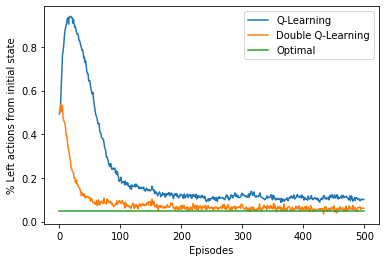

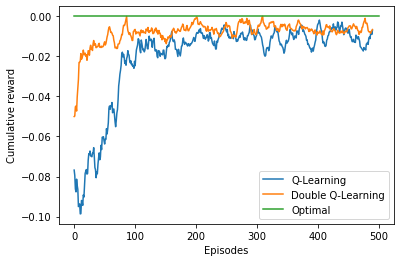

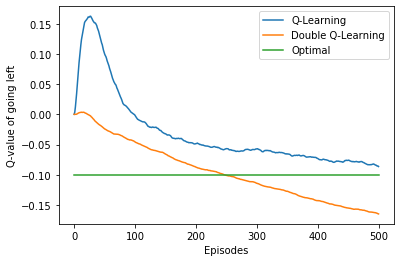

In [9]:
# left_counts_q_mean = left_counts_q.mean(axis=0)
# left_counts_double_q_mean = left_counts_double_q.mean(axis=0)
# plt.plot(left_counts_q_mean, label='Q-Learning')
# plt.plot(left_counts_double_q_mean, label='Double Q-Learning')
# if SIGN == 'neg':
#     optimal_line = np.ones(episodes) * EPSILON/2
# else:
#     optimal_line = 1 - np.ones(episodes) * EPSILON/2
# plt.plot(optimal_line, label='Optimal')
# plt.xlabel('Episodes')
# plt.ylabel('% Left actions from initial state')
# plt.legend()
# plt.savefig('images/sc-{}-policy.png'.format(SIGN))
# plt.show()
# plt.close()

# cum_reward_q_mean = cum_reward_q.mean(axis=0)
# cum_reward_double_q_mean = cum_reward_double_q.mean(axis=0)
# plt.plot(running_mean(cum_reward_q_mean, n=10), label='Q-Learning')
# plt.plot(running_mean(cum_reward_double_q_mean, n=10), label='Double Q-Learning')
# plt.plot(np.ones(episodes) * np.max([0, MEAN_REWARD]) - 0.05*abs(MEAN_REWARD) , label='Optimal')
# plt.xlabel('Episodes')
# plt.ylabel('Cumulative reward')
# plt.legend()
# plt.savefig('images/sc-{}-cumreward.png'.format(SIGN))
# plt.show()
# plt.close()

# Bqvalue_q_mean = Bqvalue_q.mean(axis=0)
# Bqvalue_double_q_mean = Bqvalue_double_q.mean(axis=0)
# plt.plot(Bqvalue_q_mean, label='Q-Learning')
# plt.plot(Bqvalue_double_q_mean, label='Double Q-Learning')
# plt.plot(np.ones(episodes) * MEAN_REWARD, label='Optimal')
# plt.xlabel('Episodes')
# plt.ylabel('Q-value of going left')
# plt.legend()
# plt.savefig('images/sc-{}-qval.png'.format(SIGN))
# plt.show()
# plt.close()


## Hyperparameter search

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:16<00:00,  4.75it/s]


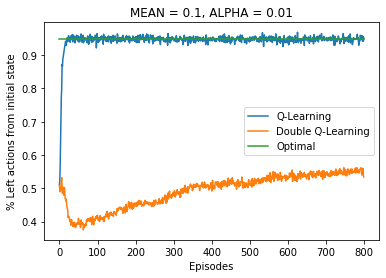

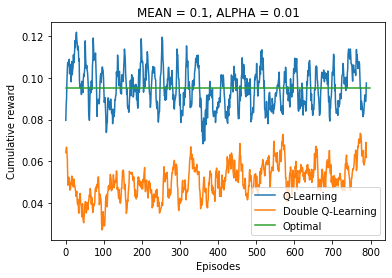

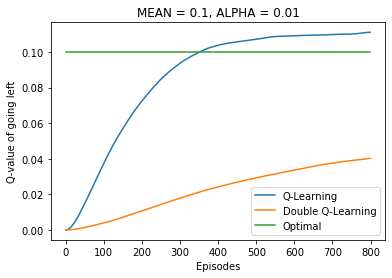

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:37<00:00,  6.11it/s]


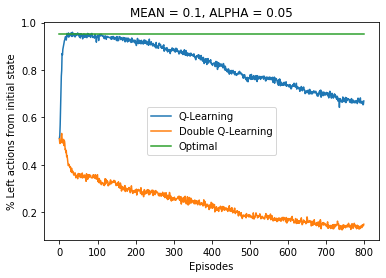

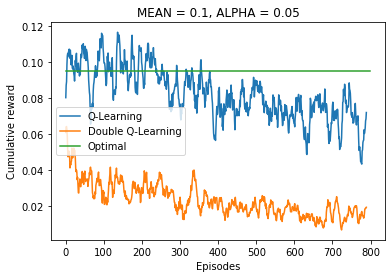

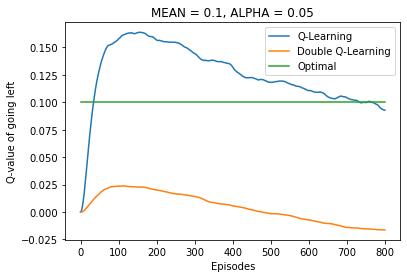

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:04<00:00,  7.12it/s]


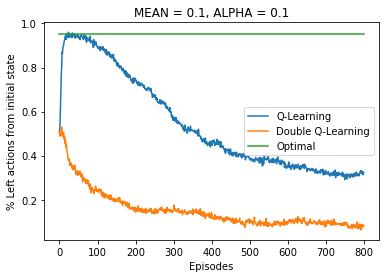

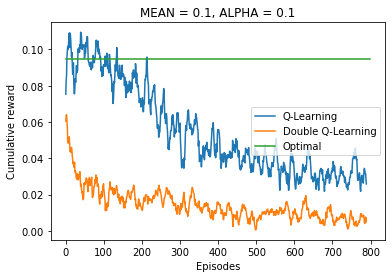

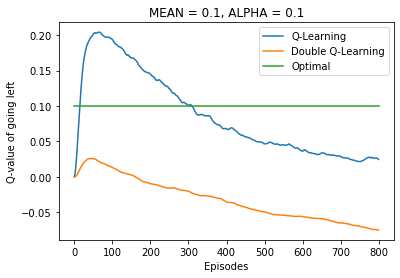

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:52<00:00,  8.03it/s]


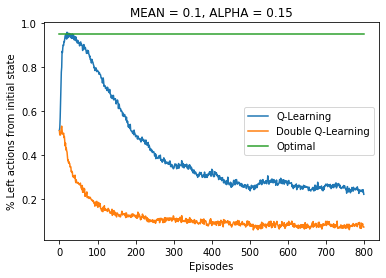

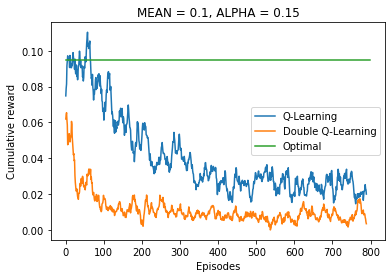

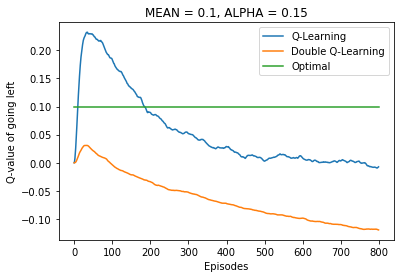

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:07<00:00,  7.58it/s]


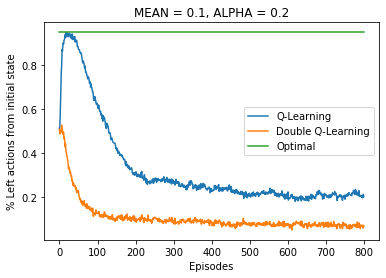

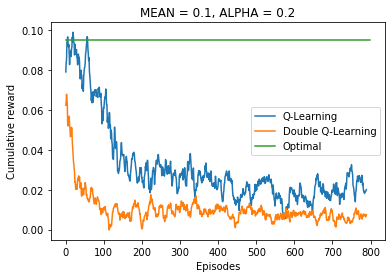

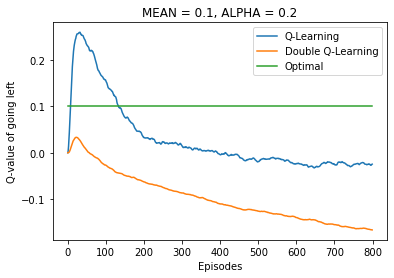

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:05<00:00,  7.95it/s]


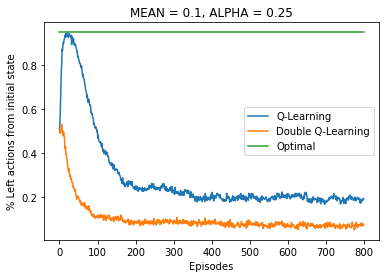

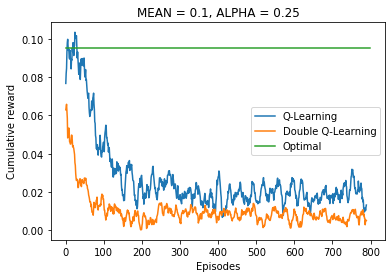

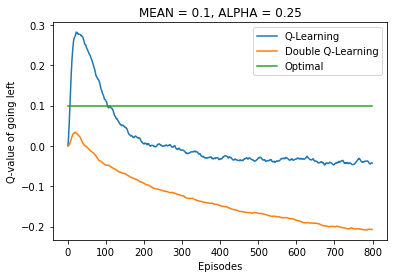

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:58<00:00,  7.82it/s]


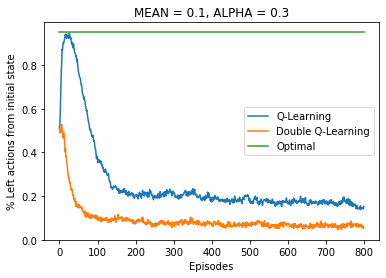

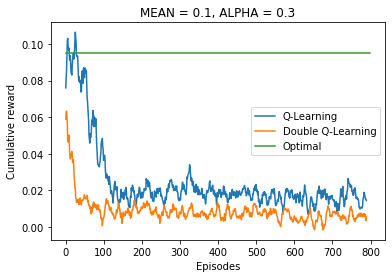

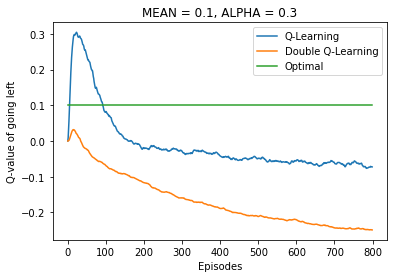

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:54<00:00,  8.61it/s]


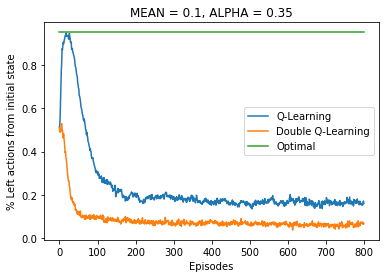

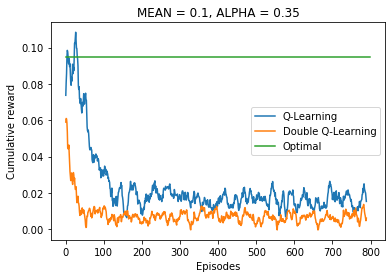

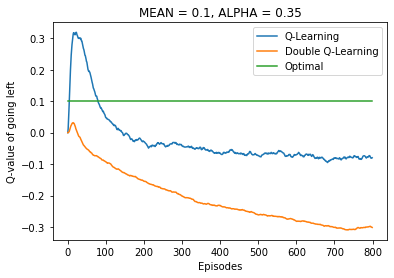

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:48<00:00,  9.22it/s]


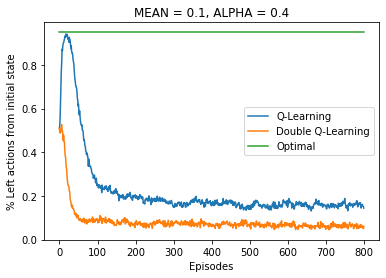

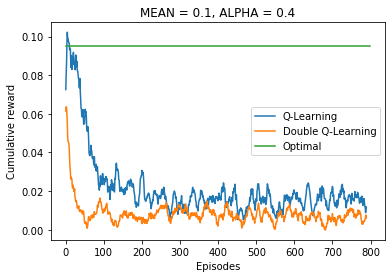

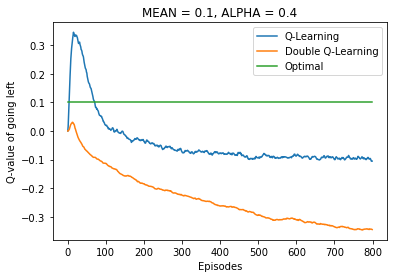

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:50<00:00,  9.01it/s]


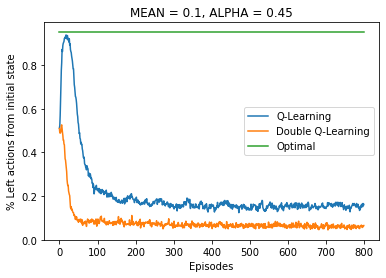

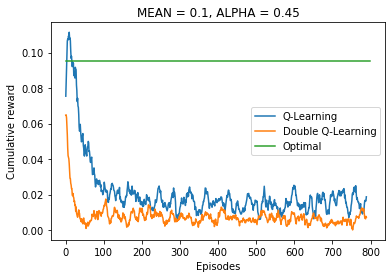

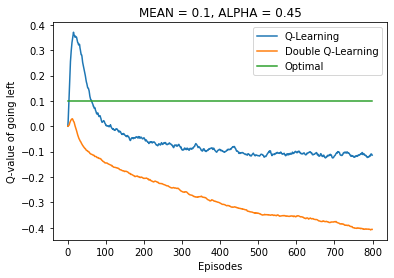

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:41<00:00, 10.37it/s]


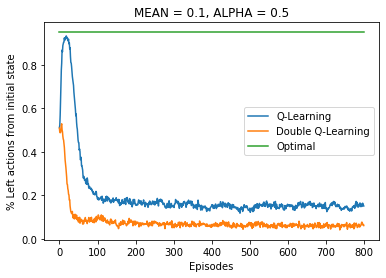

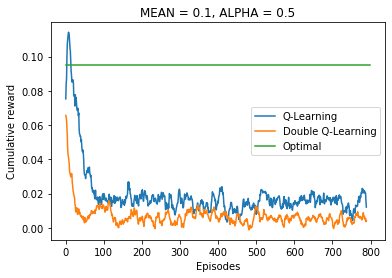

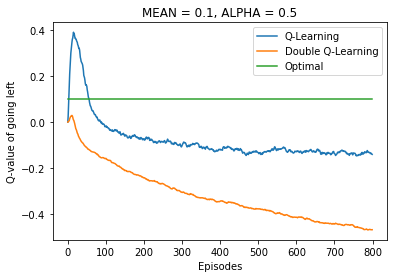

In [29]:
q_final_performances = {}
double_q_final_performances = {}
hyperparameter_seeds = list(range(9999, 9999+runs))

for l_r in [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]:
    episodes = 800
    runs = 1000
    left_counts_q = np.zeros((runs, episodes))
    left_counts_double_q = np.zeros((runs, episodes))
    cum_reward_q = np.zeros((runs, episodes))
    cum_reward_double_q = np.zeros((runs, episodes))
    Bqvalue_q = np.zeros((runs, episodes))#defaultdict(lambda: defaultdict(lambda: 0))
    Bqvalue_double_q = np.zeros((runs, episodes))#defaultdict(lambda: defaultdict(lambda: 0))

    for run in tqdm(range(runs)):
        np.random.seed(hyperparameter_seeds[run])
        q = copy.deepcopy(INITIAL_Q)
        q1 = copy.deepcopy(INITIAL_Q)
        q2 = copy.deepcopy(INITIAL_Q)
        for ep in range(0, episodes):
            left_counts_q[run, ep], cum_reward_q[run, ep], Bqvalue_q[run][ep] = q_learning(q, ALPHA_=l_r)
            left_counts_double_q[run, ep], cum_reward_double_q[run, ep], Bqvalue_double_q[run][ep] = q_learning(q1, q2, ALPHA_=l_r)

    left_counts_q_mean = left_counts_q.mean(axis=0)    
    left_counts_double_q_mean = left_counts_double_q.mean(axis=0)
    plt.plot(left_counts_q_mean, label='Q-Learning')
    plt.plot(left_counts_double_q_mean, label='Double Q-Learning')
    if SIGN == 'neg':
        optimal_line = np.ones(episodes) * EPSILON/2
    else:
        optimal_line = 1 - np.ones(episodes) * EPSILON/2
    # Save param performance of last 50 episodes
    q_final_performances[ALPHA] = left_counts_q[:, int(episodes * 0.95):].mean()
    double_q_final_performances[ALPHA] = left_counts_double_q[:, int(episodes * 0.95):].mean()
    
    plt.plot(optimal_line, label='Optimal')
    plt.xlabel('Episodes')
    plt.ylabel('% Left actions from initial state')
    plt.legend()
    plt.title('MEAN = {}, ALPHA = {}'.format(MEAN_REWARD, ALPHA))
    # plt.savefig('images/sc-{}-policy.png'.format(SIGN))
    plt.show()
    plt.close()

    cum_reward_q_mean = cum_reward_q.mean(axis=0)
    cum_reward_double_q_mean = cum_reward_double_q.mean(axis=0)
    plt.plot(running_mean(cum_reward_q_mean, n=10), label='Q-Learning')
    plt.plot(running_mean(cum_reward_double_q_mean, n=10), label='Double Q-Learning')
    plt.plot(np.ones(episodes) * np.max([0, MEAN_REWARD]) - 0.05*abs(MEAN_REWARD) , label='Optimal')
    plt.xlabel('Episodes')
    plt.ylabel('Cumulative reward')
    plt.legend()
    plt.title('MEAN = {}, ALPHA = {}'.format(MEAN_REWARD, ALPHA))
    # plt.savefig('images/sc-{}-cumreward.png'.format(SIGN))
    plt.show()
    plt.close()

    Bqvalue_q_mean = Bqvalue_q.mean(axis=0)
    Bqvalue_double_q_mean = Bqvalue_double_q.mean(axis=0)
    plt.plot(Bqvalue_q_mean, label='Q-Learning')
    plt.plot(Bqvalue_double_q_mean, label='Double Q-Learning')
    plt.plot(np.ones(episodes) * MEAN_REWARD, label='Optimal')
    plt.xlabel('Episodes')
    plt.ylabel('Q-value of going left')
    plt.legend()
    plt.title('MEAN = {}, ALPHA = {}'.format(MEAN_REWARD, ALPHA))
    # plt.savefig('images/sc-{}-qval.png'.format(SIGN))
    plt.show()
    plt.close()


In [31]:
print(q_final_performances)
print(min(q_final_performances, key=q_final_performances.get))
print(double_q_final_performances)
print(min(double_q_final_performances, key=double_q_final_performances.get))
# Negative mean reward -0.1, optimal performing ALPHA when EPSILON=0.1, is 0.15 for both models
# Positive mean reward 0.1, optimal performing ALPHA when EPSILON=0.1, is 0.5 for Q-learning and 0.45 for double Q-learning

{0.01: 0.94855, 0.05: 0.6674, 0.1: 0.315075, 0.15: 0.239375, 0.2: 0.214, 0.25: 0.19035, 0.3: 0.154175, 0.35: 0.1656, 0.4: 0.16015, 0.45: 0.153475, 0.5: 0.1495}
0.5
{0.01: 0.550775, 0.05: 0.13965, 0.1: 0.079875, 0.15: 0.078175, 0.2: 0.06935, 0.25: 0.068925, 0.3: 0.0663, 0.35: 0.06615, 0.4: 0.0619, 0.45: 0.059975, 0.5: 0.06105}
0.45


### Final experiment for positive/negative mean reward

In [142]:
# number of actions in state B
ACTIONS_B = range(0, 10)

# configuration per experiment
MEAN_REWARD = 0.1
l_r_q = 0.5
l_r_dq = 0.45

if MEAN_REWARD < 0:
    SIGN = 'negative'
else:
    SIGN = 'positive'

In [143]:
episodes = 500
runs = 1000
left_counts_q = np.zeros((runs, episodes))
left_counts_double_q = np.zeros((runs, episodes))
cum_reward_q = np.zeros((runs, episodes))
cum_reward_double_q = np.zeros((runs, episodes))
Bqvalue_q = np.zeros((runs, episodes))#defaultdict(lambda: defaultdict(lambda: 0))
Bqvalue_double_q = np.zeros((runs, episodes))#defaultdict(lambda: defaultdict(lambda: 0))
Maxq_atB_q = np.zeros((runs, episodes))
Maxq_atB_double_q = np.zeros((runs, episodes))

evaluation_seeds = range(runs)
for run in tqdm(range(runs)):
    np.random.seed(evaluation_seeds[run])
    q = copy.deepcopy(INITIAL_Q)
    q1 = copy.deepcopy(INITIAL_Q)
    q2 = copy.deepcopy(INITIAL_Q)
    for ep in range(0, episodes):
        left_counts_q[run, ep], cum_reward_q[run, ep], Bqvalue_q[run][ep], Maxq_atB_q[run][ep] = q_learning(q, ALPHA_=l_r_q)
        left_counts_double_q[run, ep], cum_reward_double_q[run, ep], Bqvalue_double_q[run][ep], Maxq_atB_double_q[run][ep] = q_learning(q1, q2, ALPHA_=l_r_dq)


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:25<00:00, 11.70it/s]


In [144]:
MEAN_REWARD

0.1

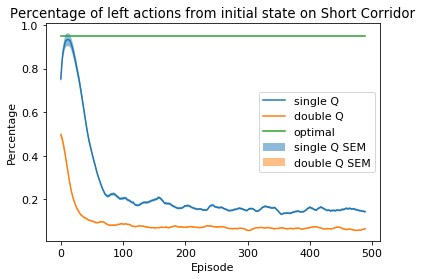

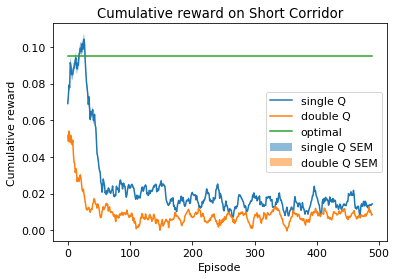

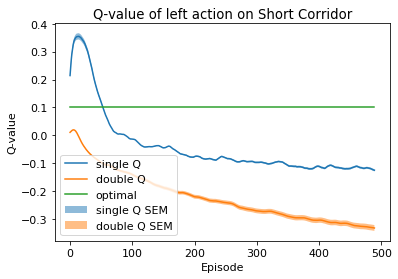

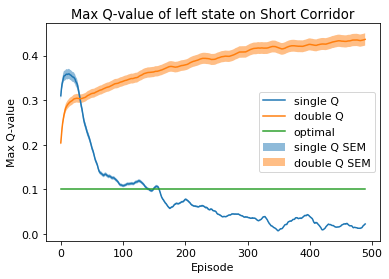

In [145]:
# plt.rcParams['font.size'] = '11'
constant = np.sqrt(runs)

n=10
mu1 = left_counts_q.mean(axis=0)
mu2 = left_counts_double_q.mean(axis=0)
sigma1 = left_counts_q.mean(axis=0) / constant
sigma2 = left_counts_double_q.mean(axis=0) / constant
plt.plot(running_mean(mu1, n), label='single Q')
plt.fill_between(np.arange(len(running_mean(mu1, n))), running_mean(mu1+sigma1, n), running_mean(mu1-sigma1, n), alpha=0.5, label='single Q SEM')
plt.plot(running_mean(mu2, n), label='double Q')
plt.fill_between(np.arange(len(running_mean(mu2, n))), running_mean(mu2+sigma2, n), running_mean(mu2-sigma2, n), alpha=0.5, label='double Q SEM')
    
if SIGN == 'neg':
    optimal_line = np.ones(episodes-10) * EPSILON/2
else:
    optimal_line = 1 - np.ones(episodes-10) * EPSILON/2
plt.plot(optimal_line, label='optimal')
plt.xlabel('Episode')
plt.ylabel('Percentage')
plt.title('Percentage of left actions from initial state on Short Corridor')

plt.legend()
plt.savefig('images/optimal-sc-{}-policy.png'.format(SIGN))
plt.show()
plt.close()

mu1 = cum_reward_q.mean(axis=0)
mu2 = cum_reward_double_q.mean(axis=0)
sigma1 = cum_reward_q.mean(axis=0) / constant
sigma2 = cum_reward_double_q.mean(axis=0) / constant
plt.plot(running_mean(mu1, n=10), label='single Q')
plt.fill_between(np.arange(len(running_mean(mu1, n))), running_mean(mu1+sigma1, n), running_mean(mu1-sigma1, n), alpha=0.5, label='single Q SEM')
plt.plot(running_mean(mu2, n=10), label='double Q')
plt.fill_between(np.arange(len(running_mean(mu2, n))), running_mean(mu2+sigma2, n), running_mean(mu2-sigma2, n), alpha=0.5, label='double Q SEM')
plt.plot(np.ones(episodes-10) * np.max([0, MEAN_REWARD]) - 0.05*abs(MEAN_REWARD) , label='optimal')
plt.xlabel('Episode')
plt.ylabel('Cumulative reward')
plt.title('Cumulative reward on Short Corridor')
plt.legend()
plt.savefig('images/optimal-sc-{}-cumreward.png'.format(SIGN))
plt.show()
plt.close()

# Action value of Q(s_start, left)
mu1 = Bqvalue_q.mean(axis=0)
mu2 = Bqvalue_double_q.mean(axis=0)
sigma1 = Bqvalue_q.mean(axis=0) / constant
sigma2 = Bqvalue_double_q.mean(axis=0) / constant
plt.plot(running_mean(mu1, n=10), label='single Q')
plt.fill_between(np.arange(len(running_mean(mu1, n))), running_mean(mu1+sigma1, n), running_mean(mu1-sigma1, n), alpha=0.5, label='single Q SEM')
plt.plot(running_mean(mu2, n=10), label='double Q')
plt.fill_between(np.arange(len(running_mean(mu2, n))), running_mean(mu2+sigma2, n), running_mean(mu2-sigma2, n), alpha=0.5, label='double Q SEM')
plt.plot(np.ones(episodes-10) * MEAN_REWARD, label='optimal')
plt.xlabel('Episode')
plt.ylabel('Q-value')
plt.title('Q-value of left action on Short Corridor')
plt.legend()
plt.savefig('images/optimal-sc-{}-qval.png'.format(SIGN))
plt.show()
plt.close()

# Perhaps plot max action value from state B?mu1 = Bqvalue_q.mean(axis=0)
mu1 = Maxq_atB_q.mean(axis=0)
mu2 = Maxq_atB_double_q.mean(axis=0)
sigma1 = Maxq_atB_q.mean(axis=0) / constant
sigma2 = Maxq_atB_double_q.mean(axis=0) / constant
plt.plot(running_mean(mu1, n=10), label='single Q')
plt.fill_between(np.arange(len(running_mean(mu1, n))), running_mean(mu1+sigma1, n), running_mean(mu1-sigma1, n), alpha=0.5, label='single Q SEM')
plt.plot(running_mean(mu2, n=10), label='double Q')
plt.fill_between(np.arange(len(running_mean(mu2, n))), running_mean(mu2+sigma2, n), running_mean(mu2-sigma2, n), alpha=0.5, label='double Q SEM')
plt.plot(np.ones(episodes-10) * MEAN_REWARD, label='optimal')
plt.xlabel('Episode')
plt.ylabel('Max Q-value')
plt.title('Max Q-value of left state on Short Corridor')
plt.legend()
plt.savefig('images/optimal-sc-{}-qval.png'.format(SIGN))
plt.show()
plt.close()

In [ ]:
{0.01: 0.136525, 0.05: 0.097675, 0.1: 0.090625, 0.15: 0.0861, 0.2: 0.0907, 0.25: 0.09495, 0.3: 0.094675, 0.35: 0.098025, 0.4: 0.098475, 0.45: 0.09985, 0.5: 0.095575}
0.15
{0.01: 0.072475, 0.05: 0.062375, 0.1: 0.056325, 0.15: 0.054425, 0.2: 0.0547, 0.25: 0.0573, 0.3: 0.054525, 0.35: 0.05615, 0.4: 0.0548, 0.45: 0.054725, 0.5: 0.055325}
0.15

{0.01: 0.94855, 0.05: 0.6674, 0.1: 0.315075, 0.15: 0.239375, 0.2: 0.214, 0.25: 0.19035, 0.3: 0.154175, 0.35: 0.1656, 0.4: 0.16015, 0.45: 0.153475, 0.5: 0.1495}
0.5
{0.01: 0.550775, 0.05: 0.13965, 0.1: 0.079875, 0.15: 0.078175, 0.2: 0.06935, 0.25: 0.068925, 0.3: 0.0663, 0.35: 0.06615, 0.4: 0.0619, 0.45: 0.059975, 0.5: 0.06105}
0.45

In [8]:
"{(0, 0): 7.837448250664876, (0, 1): 9.134657024397288, (0, 2): 8.53790450151374, (0, 3): 9.080151290921476, (0, 4): 8.837983570705312, (0, 5): 7.897240055067082, (0, 6): 8.756061883817393, (0, 7): 8.658906960595443, (0, 8): 9.016713100140318, (0, 9): 9.13894600069668, (0, 10): 8.84725873531183, (0, 11): 8.696801813820795, (0, 12): 8.345543379505015, (0, 13): 8.797761812846572, (0, 14): 8.344227047859585, (0, 15): 8.87889005408407, (0, 16): 8.369601654341249, (0, 17): 8.266849275657306, (0, 18): 8.720561481251002, (0, 19): 8.860823928735927, (0, 20): 9.136187564267125, (0, 21): 8.807223939561785, (0, 22): 8.844722108276683, (0, 23): 9.112817302990603, (0, 24): 8.986758557209424, (0, 25): 7.790777778440418, (0, 26): 8.637824926176508, (0, 27): 8.686424697268256, (0, 28): 8.607496456959925, (0, 29): 8.830698987363784, (0, 30): 8.641462921435348, (0, 31): 8.670507480027696, (0, 32): 8.431972784443593, (0, 33): 8.505773585619899, (0, 34): 8.370897013149078, (0, 35): 8.58824337819527, (0, 36): 9.137774682044842, (0, 37): 9.143598210481262}"

'{(0, 0): 7.837448250664876, (0, 1): 9.134657024397288, (0, 2): 8.53790450151374, (0, 3): 9.080151290921476, (0, 4): 8.837983570705312, (0, 5): 7.897240055067082, (0, 6): 8.756061883817393, (0, 7): 8.658906960595443, (0, 8): 9.016713100140318, (0, 9): 9.13894600069668, (0, 10): 8.84725873531183, (0, 11): 8.696801813820795, (0, 12): 8.345543379505015, (0, 13): 8.797761812846572, (0, 14): 8.344227047859585, (0, 15): 8.87889005408407, (0, 16): 8.369601654341249, (0, 17): 8.266849275657306, (0, 18): 8.720561481251002, (0, 19): 8.860823928735927, (0, 20): 9.136187564267125, (0, 21): 8.807223939561785, (0, 22): 8.844722108276683, (0, 23): 9.112817302990603, (0, 24): 8.986758557209424, (0, 25): 7.790777778440418, (0, 26): 8.637824926176508, (0, 27): 8.686424697268256, (0, 28): 8.607496456959925, (0, 29): 8.830698987363784, (0, 30): 8.641462921435348, (0, 31): 8.670507480027696, (0, 32): 8.431972784443593, (0, 33): 8.505773585619899, (0, 34): 8.370897013149078, (0, 35): 8.58824337819527, (0, 3